In [77]:
try:
  import pandas as pd 
  import numpy as np 
  import matplotlib.pyplot as plt 
  %matplotlib inline 
  import seaborn as sns 
  from convokit import Corpus
  from convokit.text_processing import TextProcessor, TextCleaner, TextParser
  from convokit.convokitPipeline import ConvokitPipeline
except ImportError as e:
  print(e)

In [90]:
corpus = Corpus("sanskar_combined_corpora/tr_corpus_1")

In [92]:
conv_df = corpus.get_conversations_dataframe().drop(["vectors"], axis=1)
utt_df = corpus.get_utterances_dataframe().drop(["vectors"], axis=1)

In [93]:
for col in conv_df.columns: 
    conv_df[col] = conv_df[col].apply(lambda val: round(val, 3))

In [72]:
utt_df["pos_sent_score"] = utt_df["meta.sentiment_polarity"].apply(lambda sentiment_dict: round(sentiment_dict["pos"], 3))
utt_df["neu_sent_score"] = utt_df["meta.sentiment_polarity"].apply(lambda sentiment_dict: round(sentiment_dict["neu"], 3))
utt_df["neg_sent_score"] = utt_df["meta.sentiment_polarity"].apply(lambda sentiment_dict: round(sentiment_dict["neg"], 3))
utt_df["count_modifiers"] = utt_df["meta.modifier_count"].apply(lambda modifier_dict: modifier_dict["count_mod_tags"])
utt_df["count_hedges"] = utt_df["meta.hedge_count"].apply(lambda hedge_dict: hedge_dict["count_hedges"])
utt_df["groupRef_count"] = utt_df["meta.groupRef_count"].apply(lambda groupRef_dict: groupRef_dict["count_group_ref"])
utt_df["subjectivity_score"] = utt_df["meta.subjectivity_score"].apply(lambda subjectivity_dict: subjectivity_dict["subjective_lexicon_count"])

In [73]:
utt_df.rename(
               columns = {
                            "meta.lowercase_text": "lowercase_text", 
                            "meta.sentiment_polarity": "sentiment_polarity", 
                            "meta.modifier_count": "modifier_count", 
                            "meta.hedge_count": "hedge_count", 
                            "meta.groupRef_count": "groupRef_count", 
                            "meta.subjectivity_score": "subjectivity_score", 
                            "meta.politeness_markers": "politeness_markers", 
                            "meta.toxicity": "toxicity", 
                            "meta.severe_toxicity": "severe_toxicity", 
                            "meta.profanity": "profanity", 
                            "meta.insult": "insult", 
                            "meta.identity_attack": "identity_attack", 
               }, inplace=True
)
utt_df.drop("vectors", axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meta.toxicity', ylabel='meta.identity_attack'>

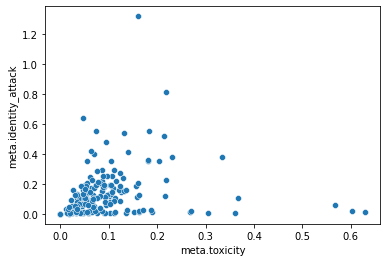

In [12]:
sns.scatterplot(conv_df["meta.toxicity"], conv_df["meta.identity_attack"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meta.hedge_count', ylabel='meta.groupRef_count'>

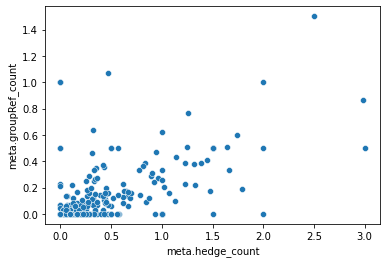

In [10]:
sns.scatterplot(conv_df["meta.hedge_count"], conv_df["meta.groupRef_count"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meta.toxicity', ylabel='meta.identity_attack'>

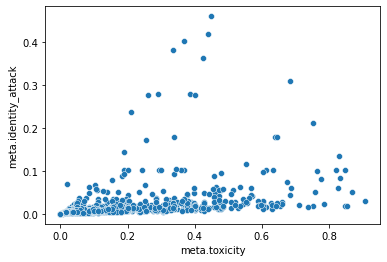

In [14]:
sns.scatterplot(utt_df["meta.toxicity"], utt_df["meta.identity_attack"])

## Univariate Analysis 

In [15]:
df_hate_ma = utt_df[["meta.insult", "meta.identity_attack", "meta.toxicity", "meta.severe_toxicity", "meta.profanity"]]

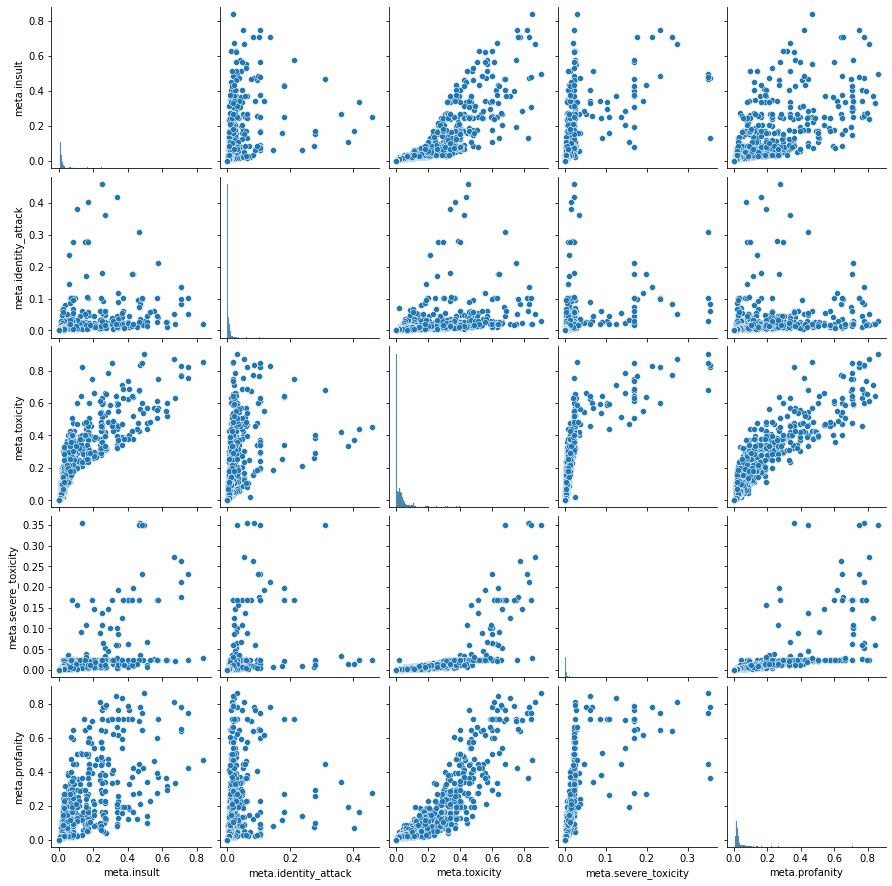

In [16]:
sns.pairplot(df_hate_ma)

<AxesSubplot:ylabel='Frequency'>

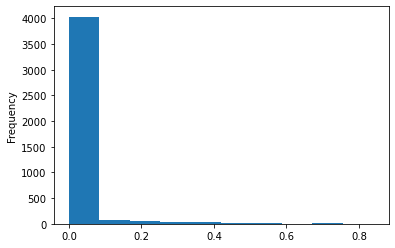

In [19]:
df_hate_ma["meta.insult"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

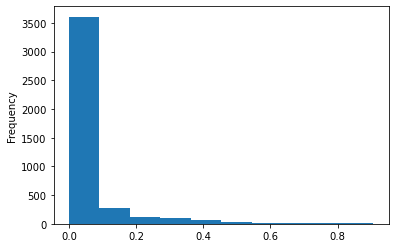

In [20]:
df_hate_ma["meta.toxicity"].plot(kind="hist")

In [21]:
df_hate_ma["meta.toxicity"].value_counts()

0.000000    1856
0.007006      23
0.006314      14
0.254629      14
0.030978      13
            ... 
0.602549       1
0.094383       1
0.058243       1
0.195994       1
0.100457       1
Name: meta.toxicity, Length: 775, dtype: int64

### Observations
- Initial analysis reveals that IDENTITY ATTACK and INSULT do not co-occur too often, AND that general INSULTS may be  often devoid of sublte non-personal comments which are targeted towards an individual's racial or sexual identity
- An INSULTING statement is not always TOXIC, as indicated by the plot. Often, INSULT attacks can be some form of rebuke or censure. Similar case can be made for INSULT's relationship with severely toxic statements 
- PROFANE statements result from an EXPLICIT usage of cusswords, which may or may not be prevalent in INSULTING statements 
- The relatively low range of SEVERE_TOXICITY is probably indicative of Reddit's tough content moderation policy 
- Microaggressions are too subtle to be identified by a normal person, let alone an open-source tool. Hence, we believe that the THRESHOLD values for identity attacks will be on the lower side. The same is reflected in the form of low parametric range for identity attacks. Performing Named Entity Recognition (NER) on comments may aid in providing identity-based node feature, thereby enriching the feature space for microaggressions  
- We can also note that values of this parameter stays low and constant against increasing values of other parameters, which indicates that it may oftne possess an individual deterministic character in detecting microaggressions.
- A point can be made WRT relationship between PROFANITY and TOXICITY. Mere usage of cuss words does not necessarily use toxicity, AND may often evoke positive sentiment as well. For this, we might need to study the relationship between positive sentiment scores AND the toxicity parameter 
- Since the current analysis has been derived on a few number of samples, there may be a resultant sampling bias which may or may not generalize in case we encounter a wider variety of conversation discourse structures on account of more samples. 



C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meta.positive_polarity', ylabel='meta.profanity'>

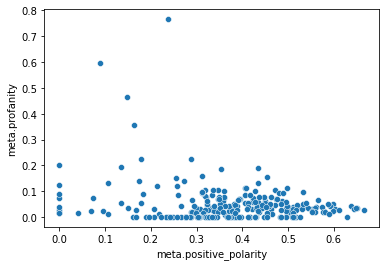

In [25]:
sns.scatterplot(conv_df["meta.positive_polarity"], conv_df["meta.profanity"])

In [27]:
utt_df["positive_polarity"] = utt_df["meta.sentiment_polarity"].apply(lambda sentiment_dict: sentiment_dict["pos"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meta.profanity', ylabel='positive_polarity'>

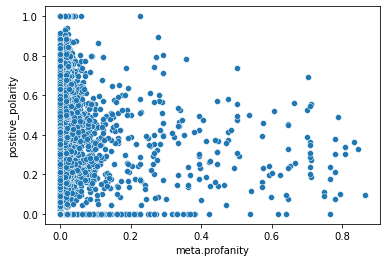

In [30]:
sns.scatterplot(utt_df["meta.profanity"], utt_df["positive_polarity"])

Thus, it can be claimed that profane language can be used positively, and does not necessarily evoke positive sentiment 

In [36]:
utt_df["gratitude"] = utt_df["meta.politeness_markers"].apply(lambda feature_dict: feature_dict["feature_politeness_==Gratitude=="])
utt_df["deference"] = utt_df["meta.politeness_markers"].apply(lambda feature_dict: feature_dict["feature_politeness_==Deference=="])
utt_df["greeting"] = utt_df["meta.politeness_markers"].apply(lambda feature_dict: feature_dict["feature_politeness_==Indirect_(greeting)=="])
utt_df["pos_lexicons"] = utt_df["meta.politeness_markers"].apply(lambda feature_dict: feature_dict["feature_politeness_==HASPOSITIVE=="])

<AxesSubplot:xlabel='pos_lexicons', ylabel='positive_polarity'>

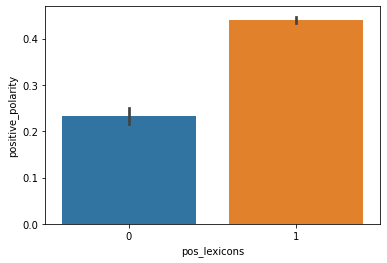

In [40]:
# Distribution of positive sentiment WRT politeness markers 
sns.barplot(x="pos_lexicons", y="positive_polarity", data=utt_df)

<AxesSubplot:xlabel='positive_polarity', ylabel='meta.profanity'>

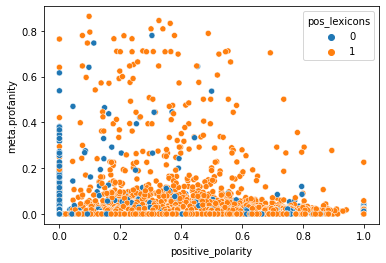

In [42]:
sns.scatterplot(x='positive_polarity', y='meta.profanity', data=utt_df, hue='pos_lexicons')

Hence, this distribution shows that other profane words/language can be used with polite words to evoke a positive sentiment 

In [44]:
utt_df.to_csv("main_corpus.csv")

In [95]:
utt_df.to_parquet("utterances_data.parquet", engine="pyarrow", compression="snappy")
conv_df.to_parquet("conv_data.parquet", engine="pyarrow", compression="snappy")